## About the Dataset

This database contains 76 attributes, but all published experiments refer to using a subset of 13 of them.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 which means presence of no hear disease and 1 means presence of disease. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence i.e value 1 from absence (value 0).

The data includes 303 patient level features including if they have heart disease at the end or not. Features are like;
Age: Obvious one.
1. Sex:
  * 0: Female
  * 1: Male
2. Chest Pain Type:
  * 0: Typical Angina
  * 1: Atypical Angina
  * 2: Non-Anginal Pain
  * 3: Asymptomatic
3. Resting Blood Pressure: Person's resting blood pressure.
4. Cholesterol: Serum Cholesterol in mg/dl
5. Fasting Blood Sugar:
  * 0:Less Than 120mg/ml
  * 1: Greater Than 120mg/ml
6. Resting Electrocardiographic Measurement:
  * 0: Normal
  * 1: ST-T Wave Abnormality
  * 2: Left Ventricular Hypertrophy
7. Max Heart Rate Achieved: Maximum Heart Rate Achieved
8. Exercise Induced Angina:
  * 1: Yes
  * 0: No
9. ST Depression: ST depression induced by exercise relative to rest.
10. Slope: Slope of the peak exercise ST segment:
  * 0: Upsloping
  * 1: Flat
  * 2: Downsloping
11. Thalassemia: A blood disorder called 'Thalassemia':
  * 0: Normal
  * 1: Fixed Defect
  * 2: Reversable Defect
12. Number of Major Vessels: Number of major vessels colored by fluoroscopy.


In [14]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [15]:
# We are reading our data
df = pd.read_csv("/home/lenovo/Downloads/heart.csv")

# First 5 rows of our data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
#Change the column names for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [17]:
#Finding the shape of the dataframe
df.shape

(303, 14)

In [18]:
# Describing the Dataframe
df.describe()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
#Finding information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [20]:
#Finding the missing values. In this dataframe there is no missing value.
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [21]:
#Finding the percentage of patients with heart disease and the one without heart disease

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


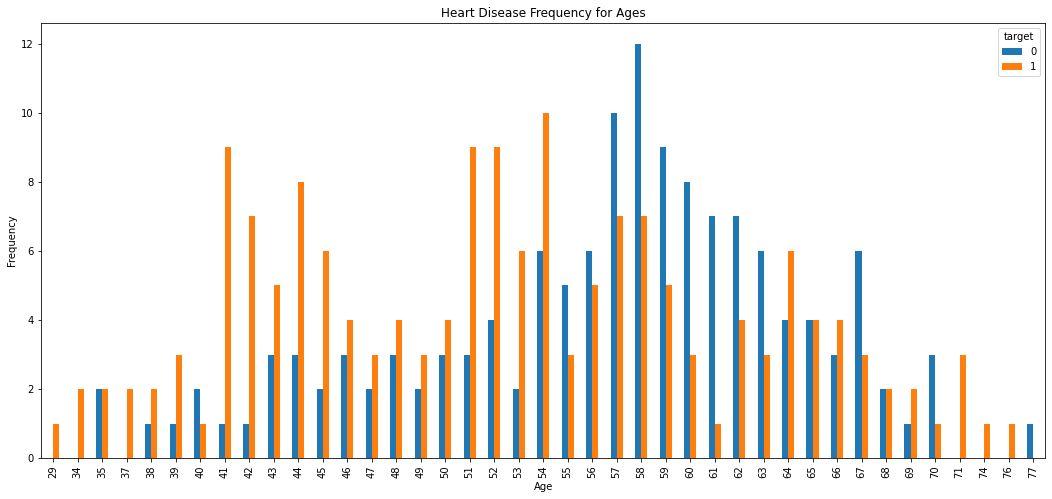

In [22]:
#Finding heart disease frequency with the age parameter

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(18,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()



<hr>

## Chances of heart disease is maximum for people in the range of 51-54 and maximum for the age of 54. 

<hr/>



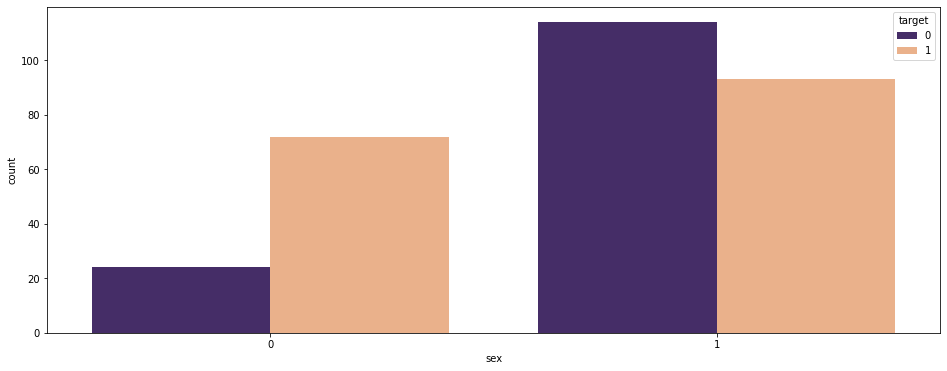

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot("sex", hue="target", data=df, palette=['#432371',"#FAAE7B"]) 
plt.show()

<AxesSubplot:xlabel='chest_pain_type', ylabel='max_heart_rate_achieved'>

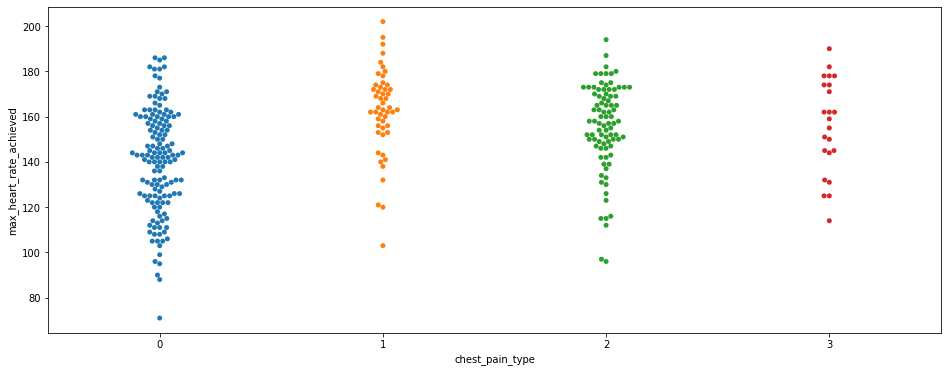

In [24]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x = 'chest_pain_type', y = 'max_heart_rate_achieved', data = df)

## The highest maximum heart rate achieved is for chest_pain_type 1.

---

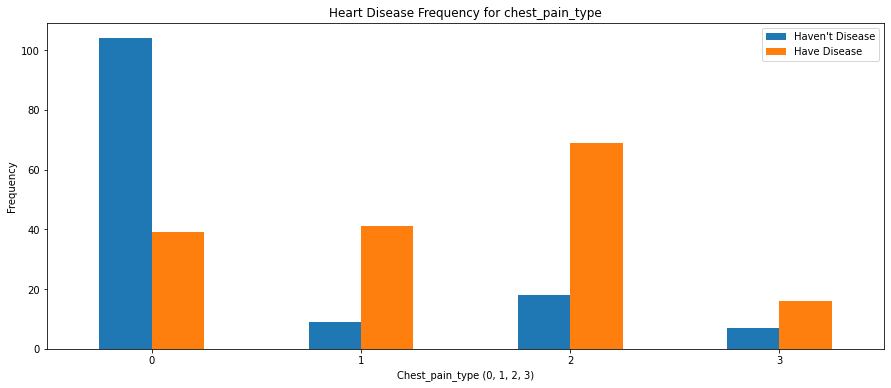

In [25]:
#Relation of heart disease with chest_pain_type. Here the chest_pain_type 2 has highest chance to have heart disease
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for chest_pain_type')
plt.xlabel('Chest_pain_type (0, 1, 2, 3)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


## The chances of having a heart disease is maximum with the chest pain type 2 and minimum for chest pain type 3. 

---

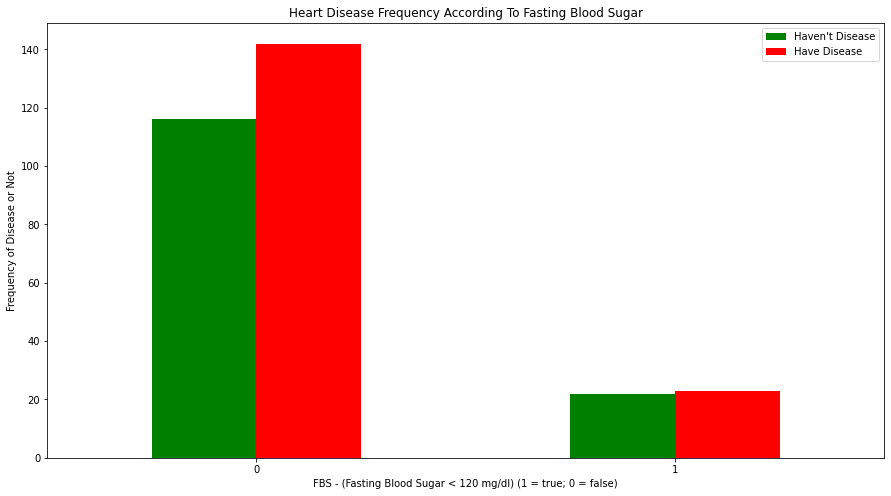

In [26]:
#Finding frequency of heart disease with Fasting blood sugar. 
pd.crosstab(df.fasting_blood_sugar 	,df.target).plot(kind="bar",figsize=(15,8), color = ["green", "red"])
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar < 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()


## People with blood sugar has higher chances of heart disease than the people without the problem of blood sugar.

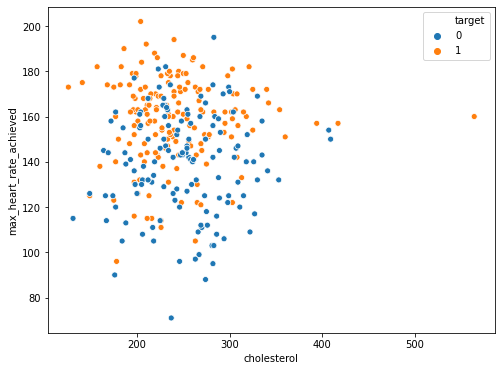

In [27]:
#Relation between cholestrol and maximum heart rate achieved with chances of target either 0 or 1
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='max_heart_rate_achieved',data=df,hue='target')
plt.show()


## People with more cholestrol has higher maximum heart rate achieved and they are also at higher risk of heart disease.

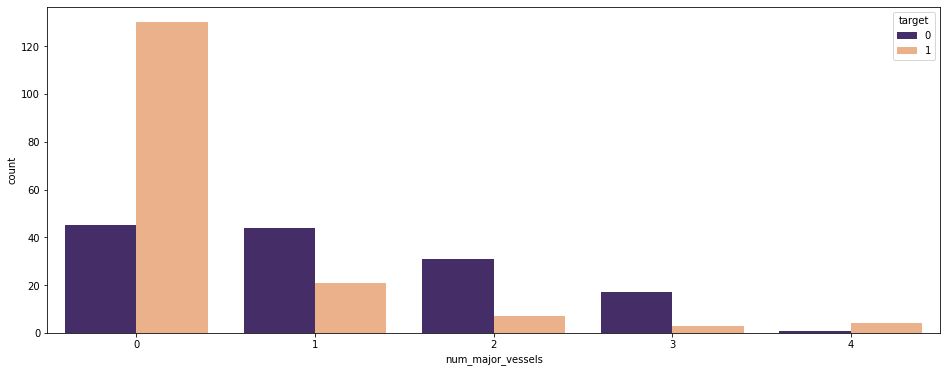

In [28]:
plt.figure(figsize=(16, 6))
sns.countplot("num_major_vessels", hue="target", data=df, palette=['#432371',"#FAAE7B"]) 
plt.show()

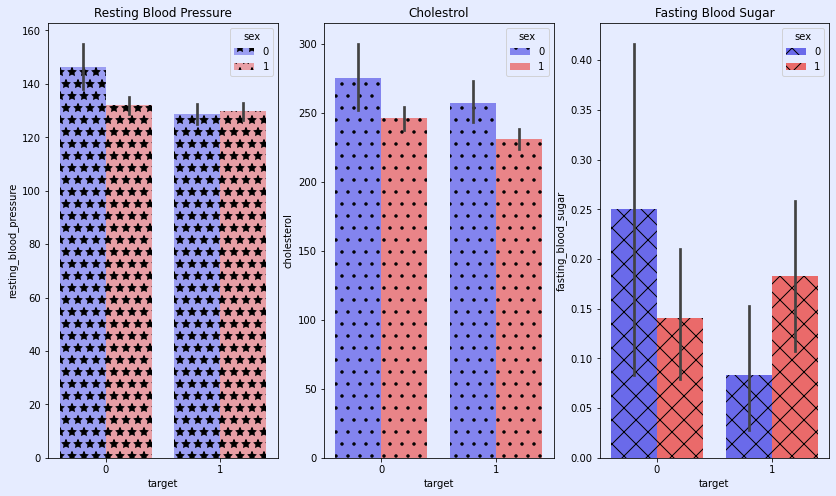

In [29]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='target',y='resting_blood_pressure',data=df,hue='sex',palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})
plt.title('Resting Blood Pressure')
plt.subplot(1, 3, 2)
sns.barplot(x='target',y='cholesterol',data=df,hue='sex',palette='seismic',**{'hatch':'.','alpha':0.8,'linewidth':2})
plt.title('Cholestrol')
plt.subplot(1, 3, 3)
sns.barplot(x='target',y='fasting_blood_sugar',data=df,hue='sex',palette='seismic',**{'hatch':'x','linewidth':2})
plt.title('Fasting Blood Sugar')
plt.show()

1. Both male and female with heart disease have same resting blood pressure.

2. Females have higher cholestrol than male. Female with cholestrol have higher chances of heart disease.

3. Male with heart disease has higher blood sugar level than females.

<AxesSubplot:>

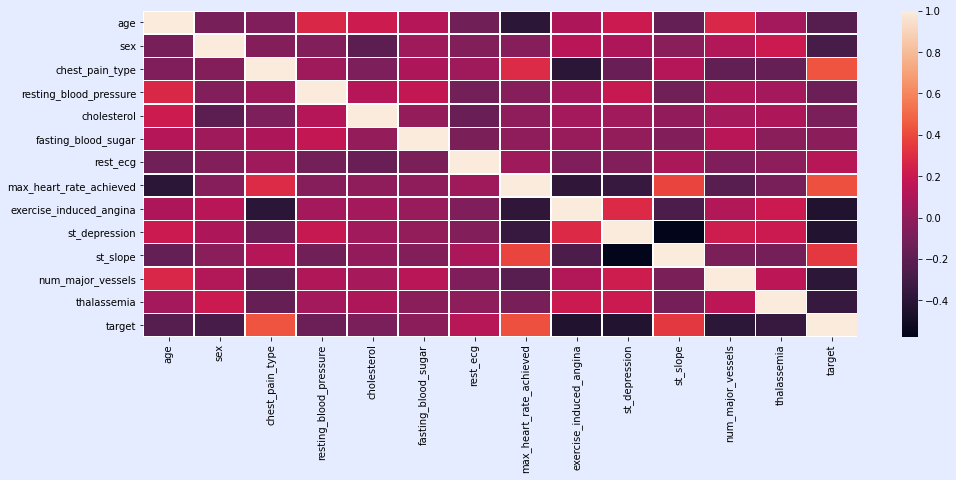

In [30]:
plt.figure(figsize=(16, 6))
corr = df.corr()
sns.heatmap(corr, linewidths=.5)

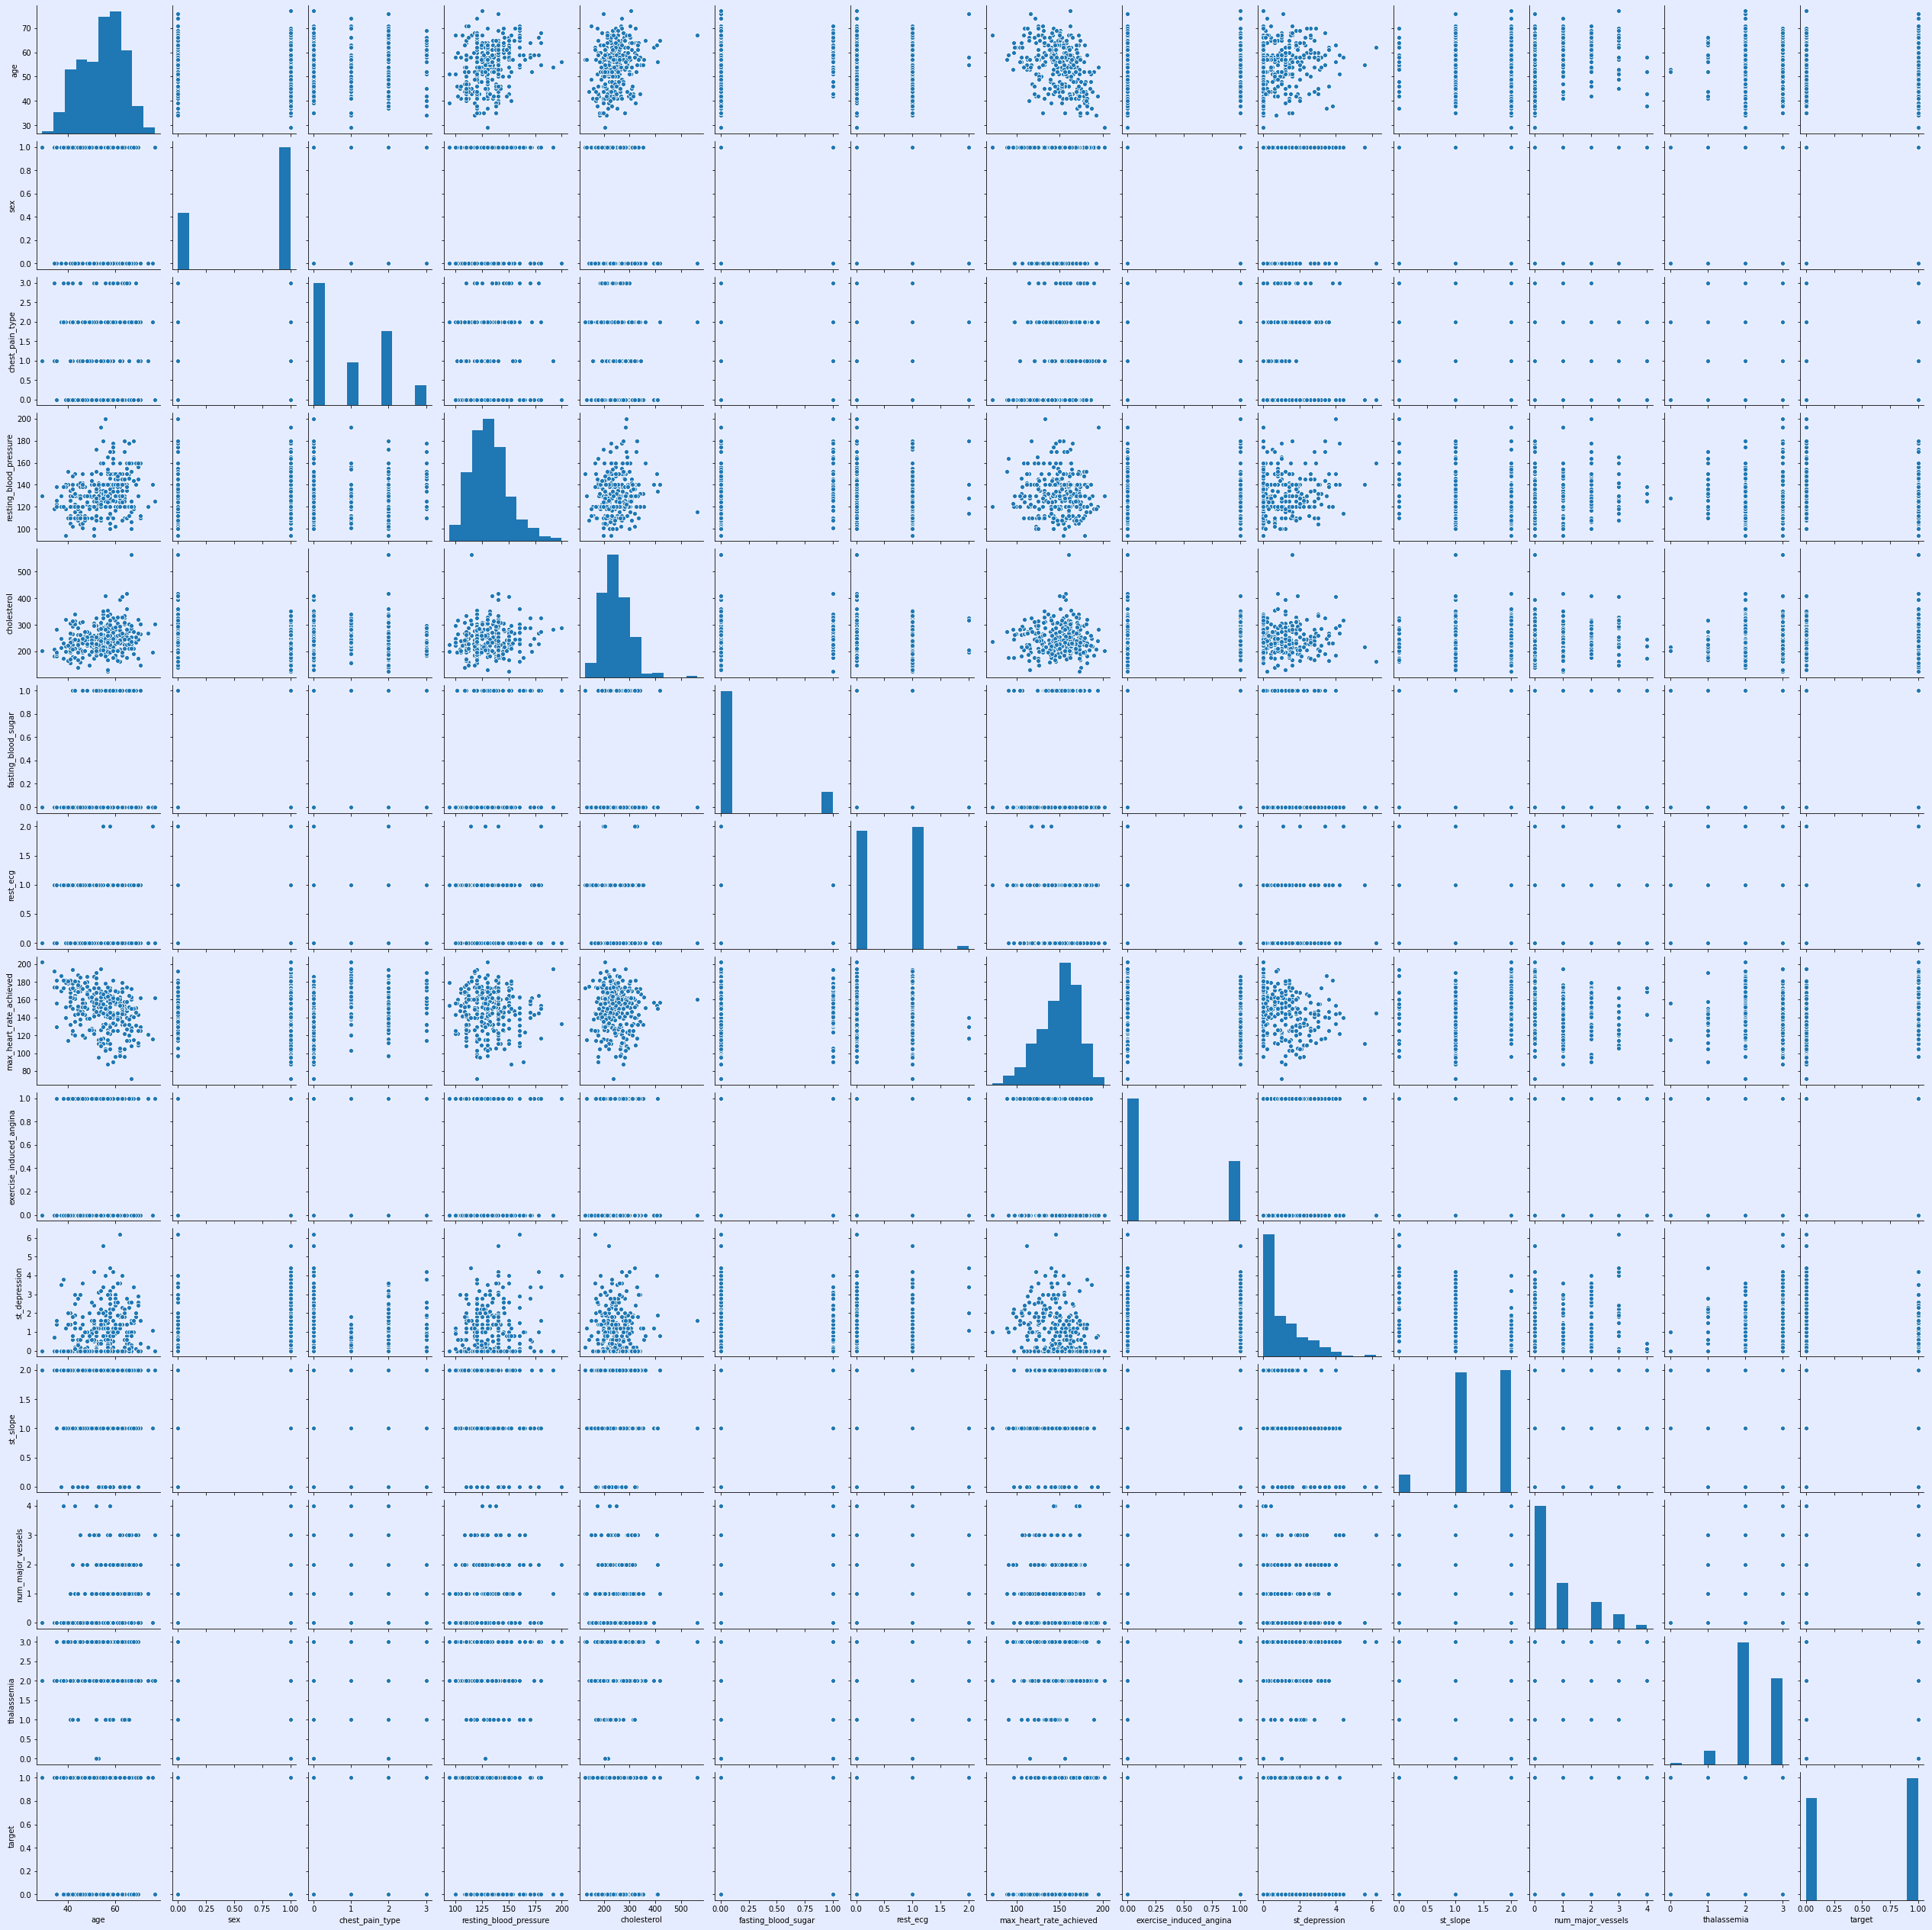

In [31]:
sns.pairplot(df)
plt.show()